In [1]:
%load_ext autoreload



%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import time

In [2]:
from frm_dataset_loader import load_dataset
from conf_dataset_1 import *


['ook', 'ask4', 'ask8', 'bpsk', 'qpsk', 'psk8', 'psk16', 'psk32', 'apsk16', 'apsk32', 'apsk64', 'qam16', 'qam32', 'qam64', 'gmsk', 'cpfsk']


In [3]:
fname = 'datasets/test_1.dat'

(_,_,_,_,_,
         freq_test,timing_offNum_test,timing_step_test,
         _,mod_test,snr_test) = load_dataset(fname,max_sps,len(mod_list))

In [4]:
with open(f'outputs/005.pkl','rb') as f:
    res_dpn = pickle.load(f)

In [5]:
(pred_freq,pred_timing_step,pred_timing_off,pred_mod_dec, nmse_all,nmse2_all,nmse2t_all,test_ser) = res_dpn['dpn'] 
pred_freq = pred_freq.flatten()

In [6]:
from frm_eval_utils import ecdf,filter_mod_snr, eval_by_snr

In [7]:
true_freq = freq_test
pred_freq = pred_freq
rae_freq = np.abs(true_freq-pred_freq)/np.abs(true_freq)
freq_rem = np.abs(true_freq-pred_freq)


In [8]:

func = lambda x,y : np.mean(np.abs(x-y))

freq_strt = eval_by_snr(freq_test,np.zeros_like(freq_test),snr_test,snr_list,func)
freq_dpn = eval_by_snr(pred_freq,freq_test,snr_test,snr_list,func)


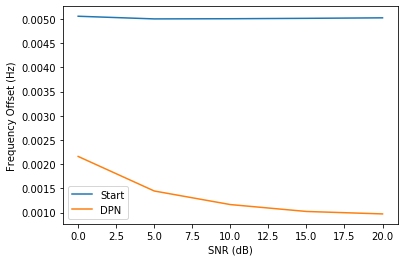

In [10]:
plt.figure()
plt.plot(snr_list*2,np.array(freq_strt)/(2*np.pi))
plt.plot(snr_list*2,np.array(freq_dpn)/(2*np.pi))


plt.xlabel("SNR (dB)")
plt.ylabel("Frequency Offset (Hz)")
plt.legend(['Start','DPN','DSP','Sep'])


In [11]:

func = lambda x,y : np.mean(np.abs(x-y))

time_off_dpn = eval_by_snr(np.round(pred_timing_off.flatten())/max_sps,timing_offNum_test/max_sps,snr_test,snr_list,func)

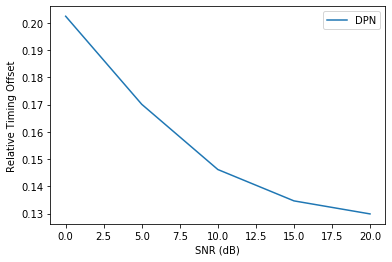

In [13]:
plt.figure()
plt.plot(snr_list*2,time_off_dpn)
plt.xlabel("SNR (dB)")
plt.ylabel("Relative Timing Offset")
plt.legend(['DPN','DSP','Sep'])


In [14]:

func = lambda x,y : np.mean(np.abs(x-y))

time_step_dpn = eval_by_snr(max_sps/np.round(pred_timing_step.flatten()),max_sps/timing_step_test,snr_test,snr_list,func)

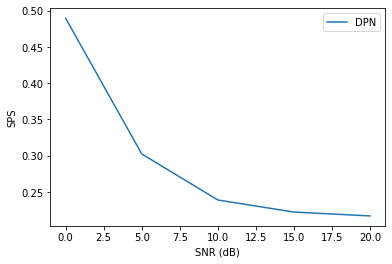

In [15]:
plt.figure()
plt.plot(snr_list*2,time_step_dpn)


plt.xlabel("SNR (dB)")
plt.ylabel("SPS")
plt.legend(['DPN','DSP','Sep'])
